<a href="https://colab.research.google.com/github/FatinNajdah/exploring_/blob/main/Data-Science/FeatureSelection_MarcoTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference
https://www.youtube.com/watch?v=hCwTDTdYirg&t


Import Libraries n Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

%matplotlib inline
#a backend command in Jupyter Notebooks that enables the rendering of Matplotlib plots directly below code cells n not in other cells or window

In [ ]:
plt.rcParams["figure.figsize"] = [12, 9]
#for every runtime, set plotsize. rcParams controls properties of a plot

Read the Data

In [ ]:
wine_data = load_wine()

wine_df = pd.DataFrame(
    data = wine_data.data,
    columns = wine_data.feature_names
)

wine_df['target'] = wine_data.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Data Exploration

<Axes: xlabel='features', ylabel='nilai'>

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


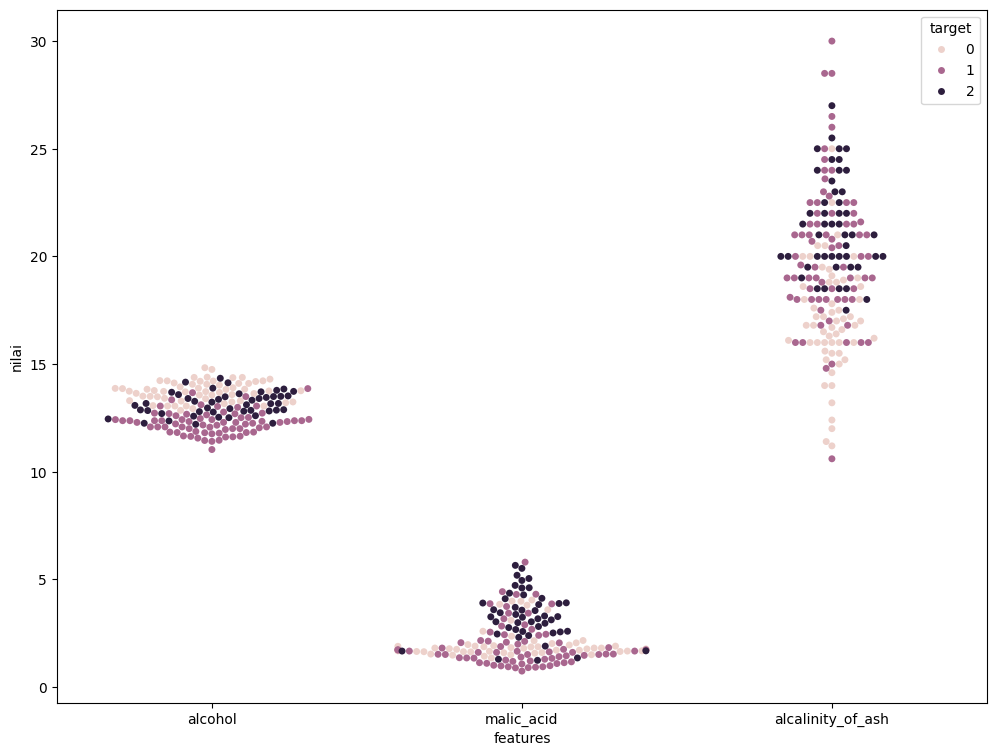

In [ ]:
from seaborn import swarmplot

data_to_plot = pd.melt(wine_df[['alcohol', 'malic_acid', 'alcalinity_of_ash', 'target']],
                       id_vars = 'target',
                       var_name = 'features',
                       value_name = 'nilai')

swarmplot(data = data_to_plot, x = 'features', y = 'nilai', hue = 'target')

In [ ]:
wine_df['target'].value_counts()

,count
target,
1,71
0,59
2,48


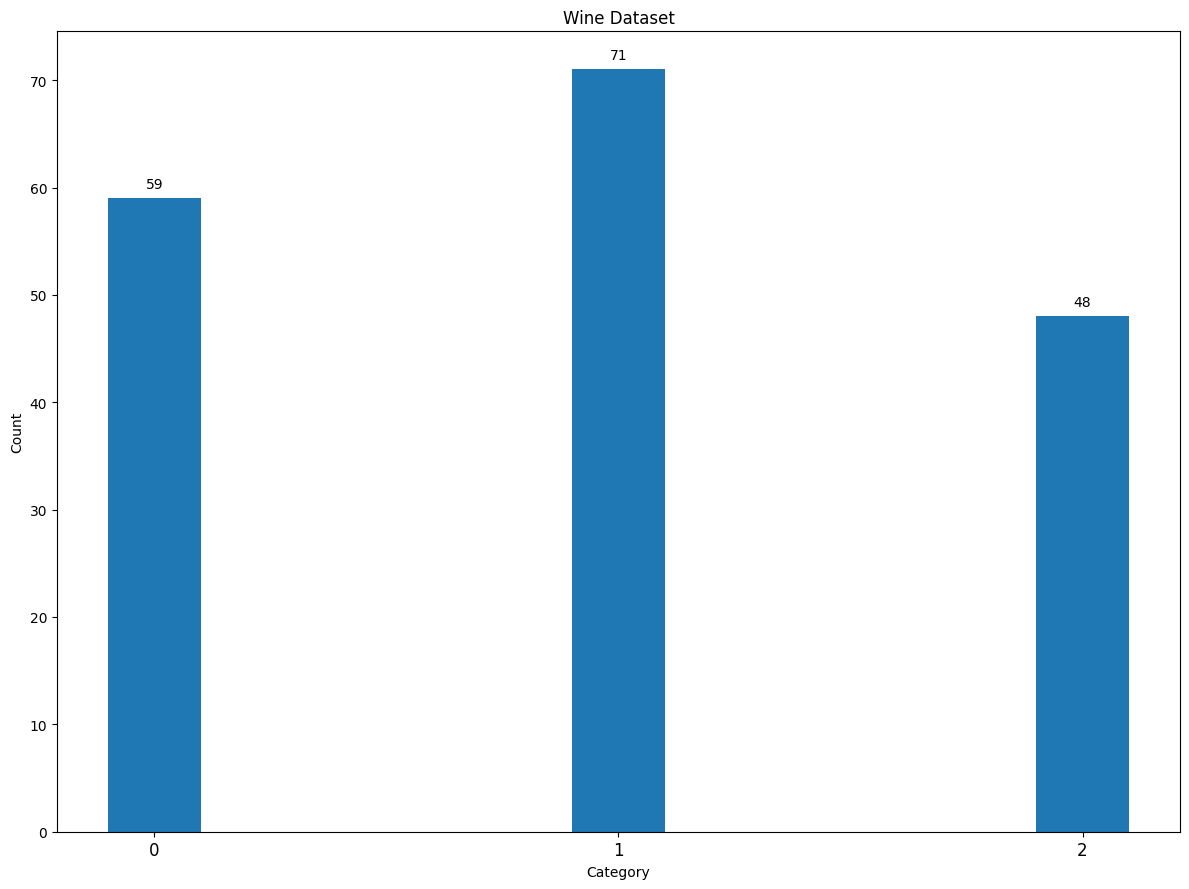

In [ ]:
fig, ax = plt.subplots()

x = [0, 1, 2] #can label anything we want
y = [wine_df['target'].value_counts()[0], wine_df['target'].value_counts()[1], wine_df['target'].value_counts()[2]]

ax.bar(x, y, width=.2)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Wine Dataset')
ax.set_xticks(x)
ax.set_xticklabels([0,1,2], fontsize = 12)

#letak nombor atas setiap bar
for index, value in enumerate(y):
    plt.text(x=int(index), y=value+1, s=str(value), ha='center')

plt.tight_layout()



Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = wine_df.drop('target', axis = 1)
y = wine_df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    shuffle = True,
    stratify = y,
    random_state = 42
    )

In [ ]:
print(X_train.shape)
print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

(124, 13)
(54, 13)


Baseline model: Gradient Boosting Classifier with all features

In [ ]:
#GBC is a ML model

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

#initialize claasifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

#trqin calssifier
gbc.fit(X_train, y_train)

#make prediction
prediction = gbc.predict(X_test)

#evaluate prediction
f1_score_all = round(f1_score(y_test, prediction, average='weighted'), 3)

print(f'F1 Score: {f1_score_all}')

F1 Score: 0.908


Feature Selection

Variance Threshold

In [ ]:
#copy train test dataset
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
#calculate variance of each feature
X_train_v1.var(axis=0)

,0
alcohol,0.658341
malic_acid,1.123507
ash,0.072433
alcalinity_of_ash,11.471279
magnesium,232.071532
total_phenols,0.393226
flavanoids,0.912299
nonflavanoid_phenols,0.013873
proanthocyanins,0.335108
color_intensity,5.669722


In [ ]:
#MinMaxScaler for normalization, so all the feature variance will be in a range of 0 to 1, make it more easily comparable
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)
#result drpd fit_transform() adlh nmpy array, n np tak ada drop(), thats why kita save result into another variable

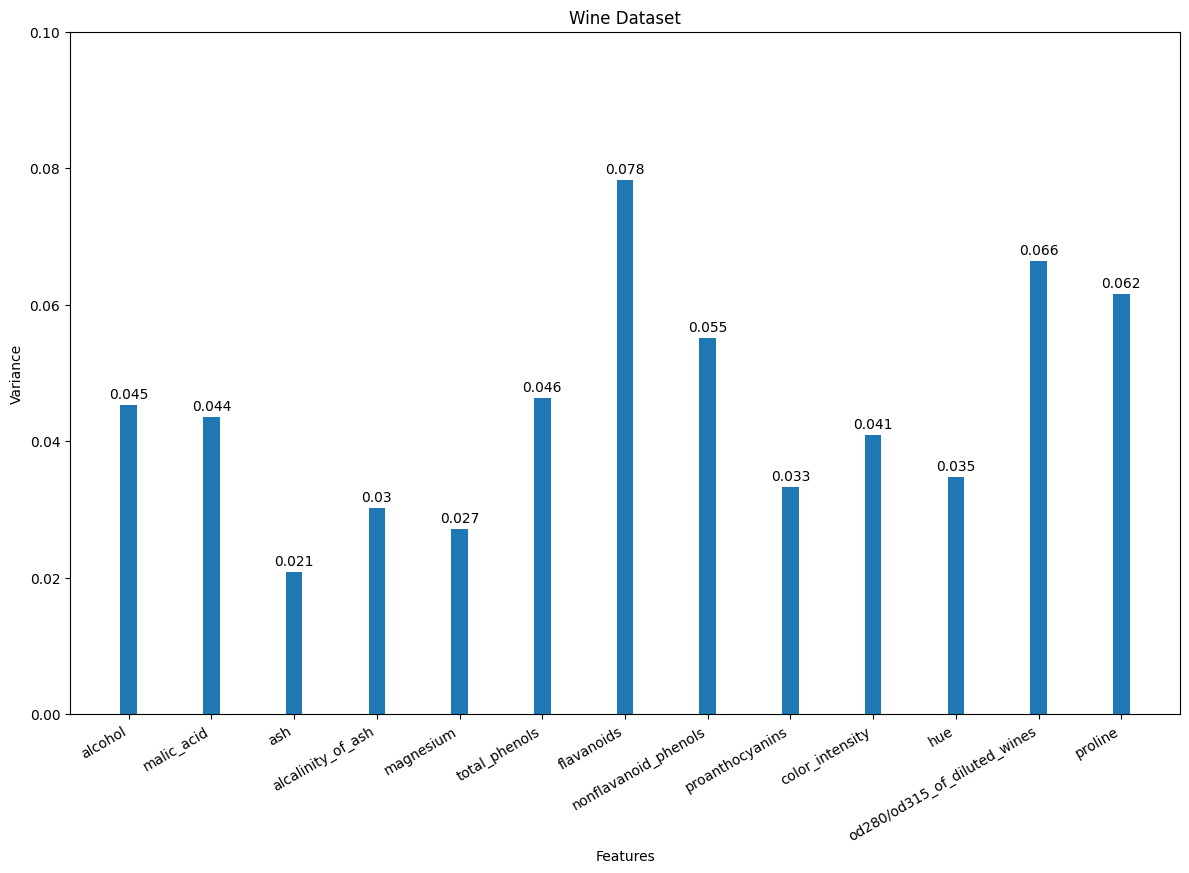

In [ ]:
fig, ax = plt.subplots()

x = X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_title('Wine Dataset')
ax.set_ylim(0, .1)

for index, value in enumerate(y):
  plt.text(x=int(index), y=value+0.001, s=str(round(value, 3)), ha='center')

plt.tight_layout()
fig.autofmt_xdate()

In [ ]:
#setting threshold at 0.03, - this is very subjective (?)

sel_X_train_v1 = X_train_v1.drop(['ash', 'magnesium'], axis=1)
sel_X_test_v1 = X_test_v1.drop(['ash', 'magnesium'], axis=1)

gbc.fit(sel_X_train_v1, y_train_v1)
var_preds = gbc.predict(sel_X_test_v1)

f1_score_var = round(f1_score(y_test_v1, var_preds, average='weighted'), 3)

print(f1_score_var)

0.963


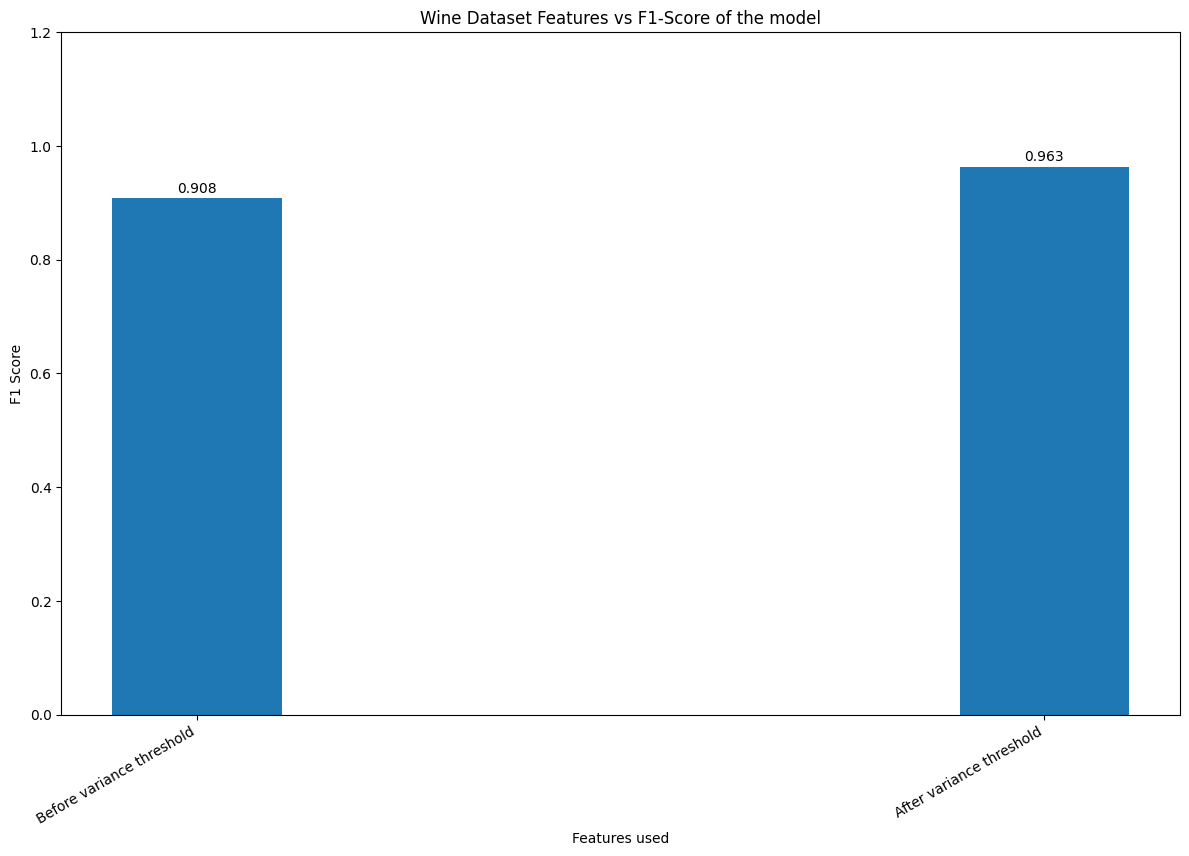

In [ ]:
#f1 score of current model > f1 score of previous model. means feature selection does helps w model performance
# lets plot the f1 score for before n after feature selection

fig, ax = plt.subplots()

x = ['Before variance threshold', 'After variance threshold']
y = [f1_score_all, f1_score_var]

ax.bar(x, y, width=.2)
ax.set_xlabel('Features used')
ax.set_ylabel('F1 Score')
ax.set_title('Wine Dataset Features vs F1-Score of the model')
ax.set_ylim(0, 1.2)

#letak label atas setiap bar
for i, value in enumerate(y):
  plt.text(x=int(i), y=value+0.01, s=str(value), ha='center')

plt.tight_layout()
fig.autofmt_xdate() #utk sengetkan label bawah

Key takeaways:
1. Variance threshold is unsupervised feature selection (doesnt consider target, only focus on mena value of the data
2. flow of this lab: Read data > data exploration > train/test data > baseline model > feature selection > updated model
3. multiclass dataset, can be used for supervised n unsupervised.
